In [220]:
# import Tensorflow
import tensorflow as tf
import tensorflow_hub as hub
print("TF version:", tf.__version__)
print("TF Hub version:", hub.__version__)

TF version: 2.11.0
TF Hub version: 0.12.0


### Getting our Data ready turning into tensors(numerical representations)

In [221]:
import pandas as pd
label_csv = pd.read_csv("drive/MyDrive/dog/labels.csv")
label_csv.head()

,id,breed
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo
2,001cdf01b096e06d78e9e5112d419397,pekinese
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever


In [222]:
label_csv.describe()

,id,breed
count,10222,10222
unique,10222,120
top,000bec180eb18c7604dcecc8fe0dba07,scottish_deerhound
freq,1,126


In [223]:
# Checking How many images are there of each breed
label_csv["breed"].value_counts()

scottish_deerhound      126
maltese_dog             117
afghan_hound            116
entlebucher             115
bernese_mountain_dog    114
                       ... 
golden_retriever         67
brabancon_griffon        67
komondor                 67
eskimo_dog               66
briard                   66
Name: breed, Length: 120, dtype: int64

<AxesSubplot:>

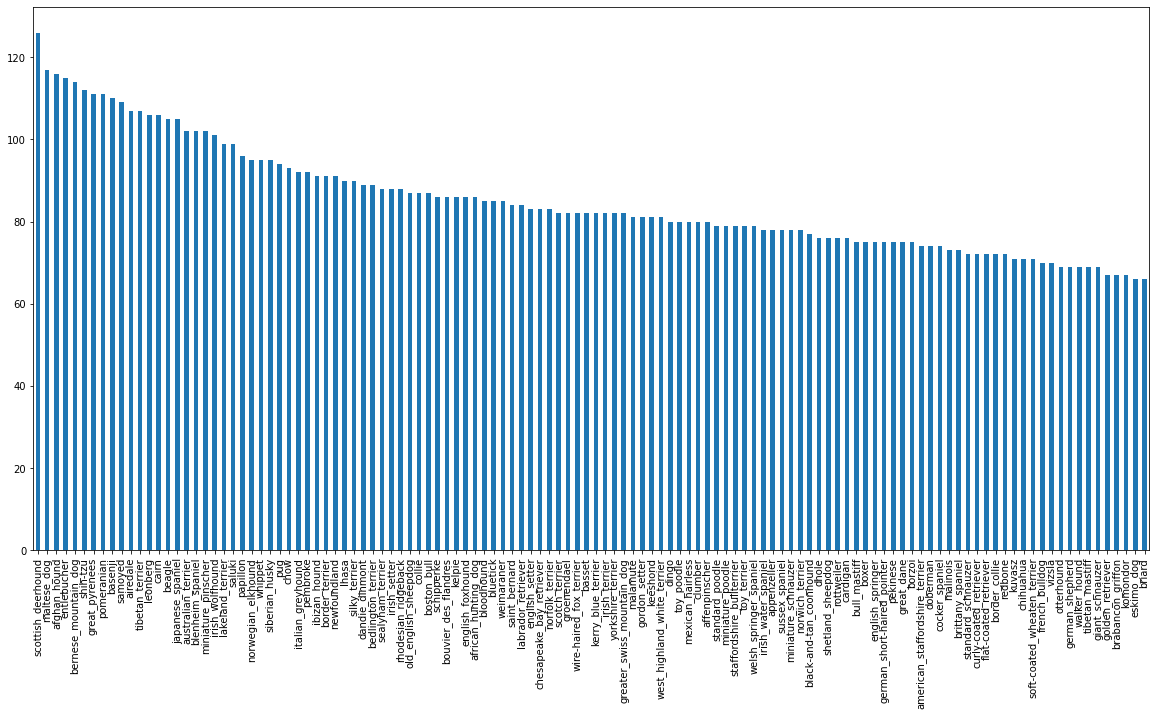

In [224]:
# let's Plot to get better idea
label_csv["breed"].value_counts().plot.bar(figsize=(20,10))

In [225]:
# number of image per breed
label_csv["breed"].value_counts().mean()

85.18333333333334

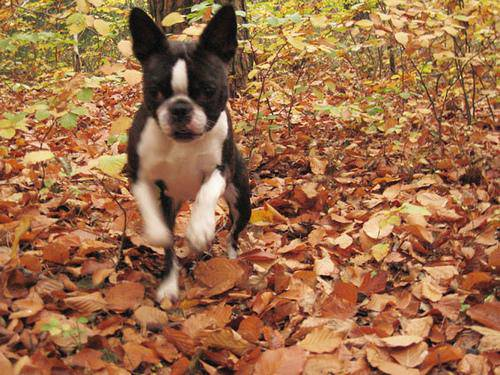

In [226]:
# Let's view an image
from IPython.display import Image
Image("/content/drive/MyDrive/dog/train/000bec180eb18c7604dcecc8fe0dba07.jpg")

### Getting Image and their labels

List the all filepathnames of our images


In [227]:
label_csv.head()

,id,breed
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo
2,001cdf01b096e06d78e9e5112d419397,pekinese
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever


In [228]:
# Create pathnames for images id's
filenames = ["/content/drive/MyDrive/dog/train/" + fnames + ".jpg" for fnames in label_csv['id']]
filenames[:5]             

['/content/drive/MyDrive/dog/train/000bec180eb18c7604dcecc8fe0dba07.jpg',
 '/content/drive/MyDrive/dog/train/001513dfcb2ffafc82cccf4d8bbaba97.jpg',
 '/content/drive/MyDrive/dog/train/001cdf01b096e06d78e9e5112d419397.jpg',
 '/content/drive/MyDrive/dog/train/00214f311d5d2247d5dfe4fe24b2303d.jpg',
 '/content/drive/MyDrive/dog/train/0021f9ceb3235effd7fcde7f7538ed62.jpg']

In [229]:
# Checking the size of all images in filenames list and label_csv are same
len(filenames) == len(label_csv)

True

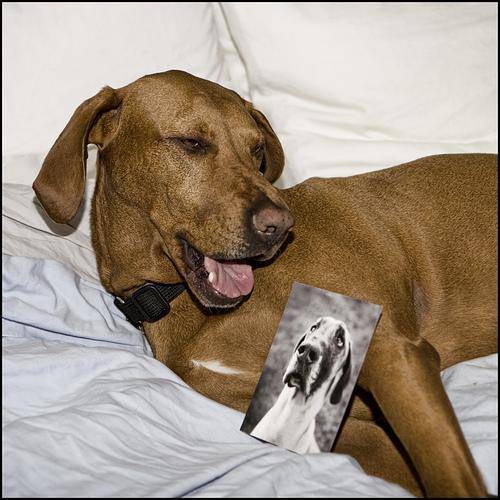

In [230]:
#  Let's check the list filenames by opening the image file
Image(filenames[100])

In [231]:
# Check the name of breed of above dog
label_csv['breed'][100]

'rhodesian_ridgeback'

In [232]:
# lets's create for labels
import numpy as np
labels = label_csv['breed']
labels = np.array(labels)
labels

array(['boston_bull', 'dingo', 'pekinese', ..., 'airedale',
       'miniature_pinscher', 'chesapeake_bay_retriever'], dtype=object)

In [233]:
len(labels)

10222

In [234]:
# compare the length of filenames and labels(for checking if any value is missing)
len(labels)==len(filenames)

True

In [235]:
# Find the unique label values
unique_breeds = np.unique(labels)
len(unique_breeds)

120

In [236]:
# Turning a single label into array of booleans
labels[0] == unique_breeds

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False])

In [237]:
# turn every label into a boolean array
boolean_labels = [label == unique_breeds for label in labels]
boolean_labels 

[array([False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False,  True, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False]),
 array([False, False, False, False, False, Fal

In [238]:
# Creating validation set
X = filenames
y = boolean_labels

In [239]:
# First work on 1000 images
NUM_IMAGES = 1000 #@param {type:"slider", min:1000, max:10000, step:100}

In [240]:
# Split our data into train and validation sets
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X[:NUM_IMAGES], y[:NUM_IMAGES], test_size=0.2, random_state=42)

len(X_train), len(y_train), len(X_val), len(y_val)

(800, 800, 200, 200)

### Preprocessing Images(turning images into Tensors)

In [241]:
# Convert image to NumPy array
from matplotlib.pyplot import imread
image = imread(filenames[10])
image.shape

(500, 375, 3)

In [242]:
image[:2]

array([[[110, 100, 108],
        [120, 110, 118],
        [112, 102, 110],
        ...,
        [ 75,  68,  75],
        [ 80,  73,  80],
        [ 74,  67,  74]],

       [[ 99,  89,  97],
        [112, 102, 110],
        [109,  99, 107],
        ...,
        [ 73,  67,  71],
        [ 78,  72,  76],
        [ 73,  67,  71]]], dtype=uint8)

In [243]:
# Turn image into a tensor
tf.constant(image)[:2]

<tf.Tensor: shape=(2, 375, 3), dtype=uint8, numpy=
array([[[110, 100, 108],
        [120, 110, 118],
        [112, 102, 110],
        ...,
        [ 75,  68,  75],
        [ 80,  73,  80],
        [ 74,  67,  74]],

       [[ 99,  89,  97],
        [112, 102, 110],
        [109,  99, 107],
        ...,
        [ 73,  67,  71],
        [ 78,  72,  76],
        [ 73,  67,  71]]], dtype=uint8)>

In [244]:
# Image Size
IMG_SIZE = 224

# Creating a function for preprocessing images

def process_image(image_path, IMG_SIZE=IMG_SIZE):
  # Take image path and convert into tensors
  # read image 
  image = tf.io.read_file(image_path)
  # Turn the jpeg image into numerical Tensor with 3 colour channels (RGB)
  image = tf.image.decode_jpeg(image, channels=3)
  # Convert colour channel from 0-255 to 0-1 values
  image = tf.image.convert_image_dtype(image, tf.float32)
  # Resize the image to our required values (224, 244)
  image = tf.image.resize(image, size=(IMG_SIZE, IMG_SIZE))
  return image

### Turning our data into batches 32(batch size) images at a time


In [245]:
# Create a simple function to return a tuple (image, label)
def get_image_label(image_path, label):
  image = process_image(image_path)
  return image, label


In [246]:
# let's test the function
(process_image(X[10]), y[10])

(<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
 array([[[0.41753423, 0.38224012, 0.40184796],
         [0.4316044 , 0.39631027, 0.4159181 ],
         [0.40602714, 0.37879497, 0.3957155 ],
         ...,
         [0.19028023, 0.17067239, 0.18635866],
         [0.28062278, 0.26101494, 0.2767012 ],
         [0.28965282, 0.27004498, 0.28573126]],
 
        [[0.36733648, 0.33204237, 0.3516502 ],
         [0.3150591 , 0.27976498, 0.29937282],
         [0.29561085, 0.26837867, 0.2852992 ],
         ...,
         [0.23583163, 0.21230222, 0.22014536],
         [0.2812507 , 0.25772128, 0.2655644 ],
         [0.26320195, 0.23967254, 0.24751568]],
 
        [[0.40703085, 0.3717367 , 0.3907143 ],
         [0.46396694, 0.42867282, 0.4476504 ],
         [0.5020599 , 0.47482777, 0.491118  ],
         ...,
         [0.27574417, 0.24076518, 0.24374136],
         [0.30945447, 0.27447549, 0.27745166],
         [0.25501153, 0.22003253, 0.22300872]],
 
        ...,
 
        [[0.26359692, 0.28712633

### Let's create function to turn all of our data ('X' and 'y') into bathches

In [247]:
# Define batch size 
BATCH_SIZE = 32

# Create a functions to turn data into batches
def create_data_batches(X, y=None, batch_size=BATCH_SIZE, valid_data=False, test_data=False):
  # if the data is test dataset(don't have labels)
  if test_data:
    print("Creating test data batches......")
    data = tf.data.Dataset.from_tensor_slices((tf.constant(X)))
    data_batch = data.map(process_image).batch(BATCH_SIZE)
    return data_batch
  
  # valid datase
  elif valid_data:
    print("Creating validation data batches......")
    data = tf.data.Dataset.from_tensor_slices((tf.constant(X), # filepath
                                               tf.constant(y))) # label
    data_batch = data.map(get_image_label).batch(BATCH_SIZE)
    return data_batch

  # Train data
  else:
    print("Creating training data batches......")
    data = tf.data.Dataset.from_tensor_slices((tf.constant(X), # filepath
                                               tf.constant(y))) # label
    data = data.shuffle(buffer_size=len(X))                                               
    data_batch = data.map(get_image_label).batch(BATCH_SIZE)
    return data_batch


In [248]:
# Create training and validation data batches
train_data = create_data_batches(X_train, y_train)
val_data = create_data_batches(X_val, y_val, valid_data=True)

Creating training data batches......
Creating validation data batches......


In [249]:
# different attributes of our data batches
train_data.element_spec, val_data.element_spec

((TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 120), dtype=tf.bool, name=None)),
 (TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 120), dtype=tf.bool, name=None)))

### Visualizing Data Batches

In [250]:
import matplotlib.pyplot as plt

# Create function for viewing images in a data batches
def show_25_images(images, labels):
  # Setup figure
  plt.figure(figsize=(10, 10))
  # Loop through 25
  for i in range(25):
    # subplot (5 row, 5 colum)
    ax = plt.subplot(5, 5, i+1)
    # Display an image
    plt.imshow(images[i])
    # Add the image label as the title
    plt.title(unique_breeds[labels[i].argmax()])
    # off the grid line
    plt.axis("off")

In [251]:
train_images, train_labels = next(train_data.as_numpy_iterator())
train_images, train_labels

(array([[[[0.3631983 , 0.15535516, 0.09444071],
          [0.38638663, 0.17255254, 0.11283877],
          [0.40021873, 0.1708376 , 0.11814442],
          ...,
          [0.57155323, 0.32951567, 0.22200473],
          [0.5894819 , 0.3614181 , 0.27178484],
          [0.5861695 , 0.36078432, 0.2734769 ]],
 
         [[0.32273638, 0.11763922, 0.06529589],
          [0.30160773, 0.08868845, 0.03615868],
          [0.36996204, 0.14361823, 0.09800822],
          ...,
          [0.5969886 , 0.39781585, 0.2863002 ],
          [0.5960908 , 0.38529325, 0.28446162],
          [0.6017305 , 0.38832015, 0.28882784]],
 
         [[0.2768426 , 0.07512401, 0.03357989],
          [0.32016423, 0.11356406, 0.06640895],
          [0.4348892 , 0.21490343, 0.17114772],
          ...,
          [0.574146  , 0.4233352 , 0.30836672],
          [0.59948796, 0.4168418 , 0.29765406],
          [0.62228906, 0.4258096 , 0.3148587 ]],
 
         ...,
 
         [[0.4450809 , 0.21807632, 0.1618351 ],
          [0.43682

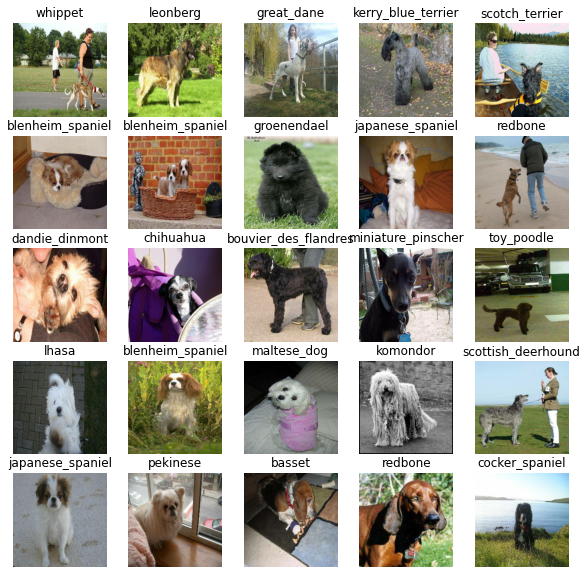

In [252]:
# Visualize the data in a training batch
train_images, train_labels = next(train_data.as_numpy_iterator())
show_25_images(train_images, train_labels)

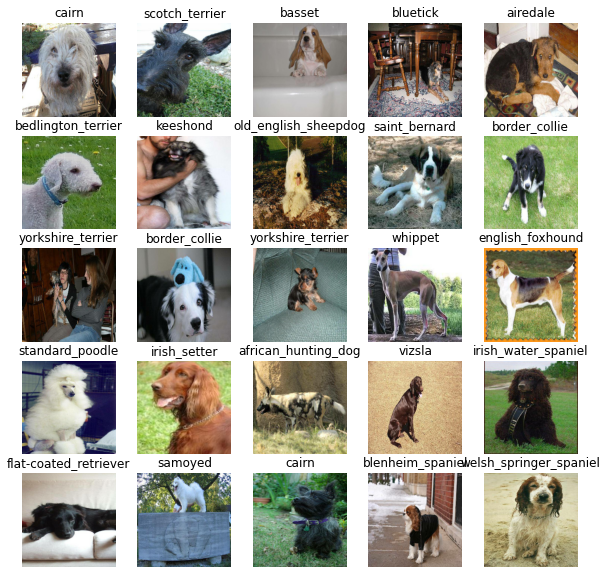

In [253]:
# Visualize the data in a Validation batch
val_images, val_labels = next(val_data.as_numpy_iterator())
show_25_images(val_images, val_labels)

### Building a Model

* The input shape(our images shape, in the form of tensors) to our model
* The output shape(image label, in the form of tensors) of our model.
* The URL of the model we want to use https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/5

In [254]:
# Setup input shape of the model

INPUT_SHAPE = [None, IMG_SIZE, IMG_SIZE, 3] # batch height width colour channels

# setup output shape of our model
OUTPUT_SHAPE = len(unique_breeds)

# Setup model URL from tensorflow HUB
MODEL_URL = "https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/5"


Now we've got our inputs, outputs and model ready to go.Let's put them together into a Keras deep Learning Model

Knowing this, let's create functions which:

* Take the input shape, output shape and the model we've choosen as parameters
* defines the layers in keras model in sequential fashion.
* Compile the model (says it should be evaluated and improved)
* Builds the model 
* Return the model

In [255]:
# Create the functions which builds a keras model

def create_model(input_shape=INPUT_SHAPE, output_shape=OUTPUT_SHAPE, model_url=MODEL_URL):
  print("Building model with : ", MODEL_URL)
  # Setup model layers
  model = tf.keras.Sequential([
      hub.KerasLayer(MODEL_URL), # Layer 1 (input layer)
      tf.keras.layers.Dense(units=OUTPUT_SHAPE,
      activation="softmax") # Layer 2 (output layer)
      ])
  # compile model
  model.compile(
      loss = tf.keras.losses.CategoricalCrossentropy(),
      optimizer = tf.keras.optimizers.Adam(),
      metrics = ['accuracy']
  )
  # Build Model

  model.build(INPUT_SHAPE)
  return model

In [256]:
model = create_model()
model.summary()

Building model with :  https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/5
Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer_8 (KerasLayer)  (None, 1001)              5432713   
                                                                 
 dense_8 (Dense)             (None, 120)               120240    
                                                                 
Total params: 5,552,953
Trainable params: 120,240
Non-trainable params: 5,432,713
_________________________________________________________________


## Creating Callback

### we create two callback   
1 - One for Tensorboard which helps track the our model progress        
2 - Early stoping which  prevents our model from training too long

In [257]:
# Load TensorBoard
%load_ext tensorboard

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [258]:
import datetime
import os

def create_tensorboard_callback():
  # create a log directory for storing logs
  logdir = os.path.join("/content/drive/MyDrive/dog/logs",
                        datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
  return tf.keras.callbacks.TensorBoard(logdir)
  

In [259]:
# Early Stoping callback

early_stoping = tf.keras.callbacks.EarlyStopping(monitor="val_accuracy",
                                                 patience=3)


## Training a model (on subset of data)

* first we use only 1000 images for testing *

In [260]:
NUM_EPOCHS = 100 #@param {type:"slider", min:10, max:100}

In [261]:
# Create Function to Trains our model

def train_model():
  # Create model
  model = create_model()

  # Create new Tensorboard session everytime we train a model
  tensorboard = create_tensorboard_callback()

  # Fit the model to the data passing it the callbacks we created
  model.fit(x=train_data, 
            epochs=NUM_EPOCHS, 
            validation_data=val_data, 
            validation_freq=1, 
            callbacks=[tensorboard, early_stoping])
  # Return The fitted model
  return model


In [262]:
# Fit the model to the data
model = train_model()

Building model with :  https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/5
Epoch 1/100
25/25 [==============================] - 9s 138ms/step - loss: 4.6448 - accuracy: 0.0775 - val_loss: 3.4757 - val_accuracy: 0.2250
Epoch 2/100
25/25 [==============================] - 4s 147ms/step - loss: 1.6539 - accuracy: 0.6787 - val_loss: 2.2130 - val_accuracy: 0.4900
Epoch 3/100
25/25 [==============================] - 4s 178ms/step - loss: 0.5671 - accuracy: 0.9450 - val_loss: 1.7260 - val_accuracy: 0.5800
Epoch 4/100
25/25 [==============================] - 3s 128ms/step - loss: 0.2546 - accuracy: 0.9850 - val_loss: 1.5584 - val_accuracy: 0.5850
Epoch 5/100
25/25 [==============================] - 3s 118ms/step - loss: 0.1489 - accuracy: 0.9975 - val_loss: 1.4542 - val_accuracy: 0.6050
Epoch 6/100
25/25 [==============================] - 3s 135ms/step - loss: 0.1025 - accuracy: 1.0000 - val_loss: 1.4147 - val_accuracy: 0.6150
Epoch 7/100
25/25 [============================

In [263]:
# Checking the tensorboard logs

# %tensorboard --logdir /content/drive/MyDrive/dog/logs

In [264]:
# making and evaluating predictions using a trained model

predictions = model.predict(val_data, verbose=1)
predictions

7/7 [==============================] - 3s 132ms/step


array([[8.7844342e-04, 1.4119882e-04, 1.6896734e-03, ..., 1.9761290e-04,
        2.4451439e-05, 6.2969571e-04],
       [1.4821850e-03, 1.1534777e-03, 1.6772542e-02, ..., 3.6269645e-04,
        6.7506423e-03, 2.6586227e-04],
       [5.1742140e-06, 6.6158726e-05, 8.9233610e-05, ..., 1.3699879e-05,
        4.0202602e-05, 8.5679383e-04],
       ...,
       [5.5936416e-05, 1.1143744e-03, 5.7432622e-05, ..., 4.4281140e-05,
        6.7987450e-05, 2.8936789e-04],
       [1.0689093e-03, 8.1468999e-05, 1.2615301e-04, ..., 1.1088314e-04,
        4.7935649e-05, 8.7034833e-03],
       [9.7211235e-04, 2.7129886e-04, 7.8291772e-03, ..., 3.9463338e-02,
        7.3497882e-04, 2.3113033e-05]], dtype=float32)

In [265]:
np.sum(predictions[0])

1.0

In [266]:
# First Prediction

index = 5
print(predictions[index])
print(f"Max value (probability of predictions): {np.max(predictions[index])}")
print(f"Sum: {np.sum(predictions[index])}")
print(f"Max index: {np.argmax(predictions[index])}")
print(f"Predicted label: {unique_breeds[np.argmax(predictions[index])]}")


[5.53621021e-06 7.04904460e-06 3.56774544e-05 7.14658853e-03
 6.86684507e-05 6.39392820e-05 2.96878916e-05 7.15518108e-05
 1.78423172e-04 5.11514509e-06 9.54021037e-01 2.57703723e-05
 3.64453372e-05 1.16929572e-04 2.33623723e-05 5.58295869e-04
 4.87007928e-05 6.63763567e-05 1.89157552e-04 1.00653961e-04
 3.06049405e-05 7.63749704e-05 2.10087292e-05 5.72731187e-05
 2.22332208e-04 3.77475008e-05 1.13770202e-05 2.65330145e-05
 2.90736812e-03 3.76745666e-05 7.90612103e-06 8.12083366e-04
 1.02612985e-05 1.15319577e-04 7.66104553e-04 6.81895763e-05
 3.80646452e-05 2.07082612e-05 1.03642276e-04 2.08806625e-04
 5.52622223e-05 1.67446506e-05 1.23580816e-04 5.83265864e-05
 5.17043663e-05 4.60187512e-05 1.51282957e-05 1.72092143e-04
 1.57655722e-05 5.43353599e-05 6.43115927e-05 8.89083731e-06
 5.19191526e-05 9.73115602e-05 1.25136849e-05 1.49605481e-03
 6.24492604e-05 3.53154610e-04 1.82056229e-03 8.38184089e-04
 1.11887064e-04 3.05386580e-04 7.31276523e-05 2.81335269e-06
 6.89131557e-04 9.511937

In [267]:
# Cross check the Label of above Max index
unique_breeds[10]

'bedlington_terrier'

### Creating a function turn our prediction probabilities into their respective label (to get better idea with image)

In [268]:
def get_pred_label(prediction_probabilities):
  return unique_breeds[np.argmax(prediction_probabilities)]

# Get a predicted label based on an array of prediction probabilites
pred_label = get_pred_label(predictions[10])
pred_label

'lhasa'

In [313]:


def unbatchify(data):
    """ Takes a batched dataset of (image, label) Tensors and returns separate arrays of images and labels.  """
    data_as_list = list(data.unbatch().as_numpy_iterator())
    images = [ ]
    true_labels = [ ]
    for image, label in data_as_list:
      images.append(image)
      true_labels.append(get_pred_label(label))
    return images, true_labels 

val_images, val_labels = unbatchify(val_data)
val_images[0], val_labels[0]

(array([[[0.29599646, 0.43284872, 0.3056691 ],
         [0.26635826, 0.32996926, 0.22846507],
         [0.31428418, 0.27701408, 0.22934894],
         ...,
         [0.77614343, 0.82320225, 0.8101595 ],
         [0.81291157, 0.8285351 , 0.8406944 ],
         [0.8209297 , 0.8263737 , 0.8423668 ]],
 
        [[0.2344871 , 0.31603682, 0.19543913],
         [0.3414841 , 0.36560842, 0.27241898],
         [0.45016077, 0.40117094, 0.33964607],
         ...,
         [0.7663987 , 0.8134138 , 0.81350833],
         [0.7304248 , 0.75012016, 0.76590735],
         [0.74518913, 0.76002574, 0.7830809 ]],
 
        [[0.30157745, 0.3082587 , 0.21018331],
         [0.2905954 , 0.27066195, 0.18401104],
         [0.4138316 , 0.36170745, 0.2964005 ],
         ...,
         [0.79871625, 0.8418535 , 0.8606443 ],
         [0.7957738 , 0.82859945, 0.8605655 ],
         [0.75181633, 0.77904975, 0.8155256 ]],
 
        ...,
 
        [[0.9746779 , 0.9878955 , 0.9342279 ],
         [0.99153054, 0.99772066, 0.94278

In [270]:
get_pred_label(val_labels[0])

'affenpinscher'

In [312]:


def plot_predicted_truth_labels(image_list, true_labels_list, predictions, index):
    # Get true and preidcted labels, and the probability of prediction
    true_label = true_labels_list[index]
    predicted_label = get_pred_label(predictions[index])
    prediction_probabilty = np.max(predictions[index])*100
    # plot the image 
    plt.imshow(image_list[index])
    plt.xticks([])
    plt.yticks([])
    color = 'green' if true_label == predicted_label else 'red'
    # title is : true_lable, predicted_label, probability
    plt.title("{} / {} / {:2.0f}%".format(true_label,   
                                    predicted_label, 
                                    prediction_probabilty),
                                    color=color)

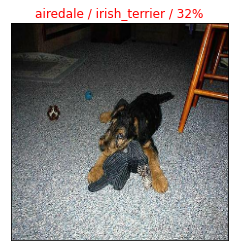

In [272]:
# plot_pred(prediction_probabilities=predictions,labels=val_labels, images=val_images)
# predictions
# lablres
# images

plot_predicted_truth_labels(val_images, val_labels, predictions, 69)


In [273]:
def save_model(model, suffix=None):
  # Create model directory with current time

  modeldir = os.path.join("/content/drive/MyDrive/dog/models", datetime.datetime.now().strftime("%Y%m%d-%H%M%s"))

  # Save format of model


  model_path = modeldir + "-" + suffix + ".h5" 
  print(f"Saving model to: {model_path}...")
  model.save(model_path)

  
  return model_path

In [274]:
def load_model(model_path):
  print(f"Loading saved model from: {model_path}")
  
  model = tf.keras.models.load_model(model_path, custom_objects={"KerasLayer":hub.KerasLayer})
  return model

In [275]:
# Save our model trained on 1000 images
save_model(model, suffix="1000-images-mobilenetv2-Test")

Saving model to: /content/drive/MyDrive/dog/models/20230301-13451677678308-1000-images-mobilenetv2-Test.h5...


'/content/drive/MyDrive/dog/models/20230301-13451677678308-1000-images-mobilenetv2-Test.h5'

In [276]:
load_1000_image_model = load_model('/content/drive/MyDrive/dog/models/20230301-11441677671082-1000-images-mobilenetv2-Test.h5')

Loading saved model from: /content/drive/MyDrive/dog/models/20230301-11441677671082-1000-images-mobilenetv2-Test.h5


In [277]:
model.evaluate(val_data)

7/7 [==============================] - 1s 87ms/step - loss: 1.2949 - accuracy: 0.6350


[1.2948870658874512, 0.6349999904632568]

In [278]:
load_1000_image_model.evaluate(val_data)

7/7 [==============================] - 1s 103ms/step - loss: 1.2608 - accuracy: 0.6600


[1.2608134746551514, 0.6600000262260437]

# On Full Data training

In [279]:
len(X), len(y)

(10222, 10222)

In [280]:
X_train[:5]

['/content/drive/MyDrive/dog/train/00bee065dcec471f26394855c5c2f3de.jpg',
 '/content/drive/MyDrive/dog/train/0d2f9e12a2611d911d91a339074c8154.jpg',
 '/content/drive/MyDrive/dog/train/1108e48ce3e2d7d7fb527ae6e40ab486.jpg',
 '/content/drive/MyDrive/dog/train/0dc3196b4213a2733d7f4bdcd41699d3.jpg',
 '/content/drive/MyDrive/dog/train/146fbfac6b5b1f0de83a5d0c1b473377.jpg']

In [281]:
full_data = create_data_batches(X, y)
full_data

Creating training data batches......


<BatchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 120), dtype=tf.bool, name=None))>

In [282]:
# create model for fulll data

full_model = create_model()

Building model with :  https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/5


In [283]:
 full_model_tensorboard = create_tensorboard_callback()
 full_model_earlystopping = tf.keras.callbacks.EarlyStopping(monitor='accuracy', patience=3)

In [284]:
# full_model.fit(x=full_data,
#                epochs=NUM_EPOCHS,
#                callbacks=[full_model_tensorboard, full_model_earlystopping])

In [285]:
save_model(full_model, suffix='full-image-set-mobilenetv2-Adam')

Saving model to: /content/drive/MyDrive/dog/models/20230301-13451677678317-full-image-set-mobilenetv2-Adam.h5...


'/content/drive/MyDrive/dog/models/20230301-13451677678317-full-image-set-mobilenetv2-Adam.h5'

In [295]:
loaded_full_model = load_model('/content/drive/MyDrive/dog/models/20230301-12381677674325-full-image-set-mobilenetv2-Adam.h5')

Loading saved model from: /content/drive/MyDrive/dog/models/20230301-12381677674325-full-image-set-mobilenetv2-Adam.h5


## Test data set 

In [318]:
# Get test images filenames
test_path = "/content/drive/My Drive/dog/test/"
test_filenames = [test_path + fname for fname in os.listdir(test_path)]

print('Number of test images {}'.format(len(test_filenames)))
test_filenames[:3]

Number of test images 10357


['/content/drive/My Drive/dog/test/e1b0cbcf3235fe9a7b35c1652081ff8d.jpg',
 '/content/drive/My Drive/dog/test/e3a43510b5f90bfb9fb050c77cabb079.jpg',
 '/content/drive/My Drive/dog/test/e6af47e8b6973c8f8d2b9fd5af94c54d.jpg']

In [319]:
test_data = create_data_batches(test_filenames, test_data=True)


Creating test data batches......


In [321]:
!pip install pickle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
ERROR: Could not find a version that satisfies the requirement pickle (from versions: none)
ERROR: No matching distribution found for pickle


In [322]:
# Make predictions on test data batch using the loaded full model
# Warning : 10.000 test images, may take a while !
test_predictions = loaded_full_model.predict(test_data,  verbose=1)

# Save predictions results
with open("/content/drive/My Drive/dog/test_predictions.pkl", 'wb') as f:
    pickle.dump(test_predictions, f)
     


324/324 [==============================] - 44s 135ms/step


NameError: ignored

In [325]:
# Get custom image filepaths
custom_path = "/content/drive/MyDrive/dog/my-dog-img/"
custom_image_paths = [custom_path + fname for fname in os.listdir(custom_path)]

# Turn custom image into batch (set to test data because there are no labels)
custom_data = create_data_batches(custom_image_paths, test_data=True)

# Make predictions on the custom data
custom_preds = loaded_full_model.predict(custom_data)

# Get custom image prediction labels
custom_pred_labels = [get_pred_label(custom_preds[i]) for i in range(len(custom_preds))]
custom_pred_labels

Creating test data batches......
1/1 [==============================] - 1s 578ms/step


['redbone', 'pomeranian', 'miniature_poodle', 'german_shepherd']

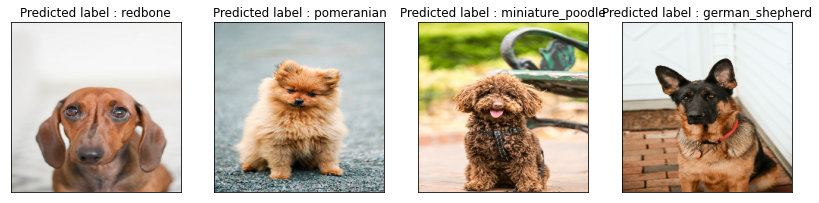

In [327]:
# Get custom images (our unbatchify() function won't work since there aren't labels)
custom_images = []
# Loop through unbatched data
for image in custom_data.unbatch().as_numpy_iterator():
  custom_images.append(image)

# Check custom image predictions
plt.figure(figsize=(14, 14))
for i, image in enumerate(custom_images):
  plt.subplot(1, 4, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.title('Predicted label : '+custom_pred_labels[i])
  plt.imshow(image)
     